In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seawater
import netCDF4 as nc
import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy
import gsw
import warnings
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

###### Put all stats in easily manageable arrays - first lists by year

In [2]:
dset = 'COMB'
yr = 2013; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2013_COMB_ds = pd.read_csv(fname)
yr = 2014; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2014_COMB_ds = pd.read_csv(fname)
yr = 2015; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2015_COMB_ds = pd.read_csv(fname)
yr = 2016; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2016_COMB_ds = pd.read_csv(fname)
yr = 2017; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2017_COMB_ds = pd.read_csv(fname)

COMB_ds = [df_2013_COMB_ds,df_2014_COMB_ds,df_2015_COMB_ds,df_2016_COMB_ds,df_2017_COMB_ds]

yr = 2013; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2013_COMB_ss = pd.read_csv(fname)
yr = 2014; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2014_COMB_ss = pd.read_csv(fname)
yr = 2015; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2015_COMB_ss = pd.read_csv(fname)
yr = 2016; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2016_COMB_ss = pd.read_csv(fname)
yr = 2017; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2017_COMB_ss = pd.read_csv(fname)

COMB_ss = [df_2013_COMB_ss,df_2014_COMB_ss,df_2015_COMB_ss,df_2016_COMB_ss,df_2017_COMB_ds]

dset = 'GRL'
yr = 2013; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2013_GRL_ds = pd.read_csv(fname)
yr = 2014; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2014_GRL_ds = pd.read_csv(fname)
yr = 2015; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2015_GRL_ds = pd.read_csv(fname)
yr = 2016; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2016_GRL_ds = pd.read_csv(fname)
yr = 2017; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2017_GRL_ds = pd.read_csv(fname)

GRL_ds = [df_2013_GRL_ds,df_2014_GRL_ds,df_2015_GRL_ds,df_2016_GRL_ds,df_2017_GRL_ds]
yr = 2013; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2013_GRL_ss = pd.read_csv(fname)
yr = 2014; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2014_GRL_ss = pd.read_csv(fname)
yr = 2015; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2015_GRL_ss = pd.read_csv(fname)
yr = 2016; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2016_GRL_ss = pd.read_csv(fname)
yr = 2017; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2017_GRL_ss = pd.read_csv(fname)
GRL_ss = [df_2013_GRL_ss,df_2014_GRL_ss,df_2015_GRL_ss,df_2016_GRL_ss,df_2017_GRL_ds]

yr = 2014; dset = 'D14'; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2014_D14_ss = pd.read_csv(fname)
yr = 2015; dset = 'D15'; fname = f'./extracted_calculated/STATS_{yr}_{dset}_salspace.csv'
df_2015_D15_ss = pd.read_csv(fname)

yr = 2014; dset = 'D14'; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2014_D14_ds = pd.read_csv(fname)
yr = 2015; dset = 'D15'; fname = f'./extracted_calculated/STATS_{yr}_{dset}_depthspace.csv'
df_2015_D15_ds = pd.read_csv(fname)

yr = 2015; dset = 'COMB'; fname = f'./extracted_calculated/STATS_2015BR3_COMB_depthspace.csv'
df_2015BR3_COMB_ds = pd.read_csv(fname)
fname = f'./extracted_calculated/STATS_{yr}BR3_{dset}_salspace.csv'
# yr = 2015; fname = f'./extracted_calculated/STATS_{yr}BR3_{dset}_salspace.csv'
df_2015BR3_COMB_ss = pd.read_csv(fname)

In [3]:
#columns are years
dic_bias_COMB_ds = np.zeros([5,5])
dic_RMSE_COMB_ds = np.zeros([5,5])
dic_WSS_COMB_ds = np.zeros([5,5])
dic_stdrat_MtoO_COMB_ds = np.zeros([5,5])

tl = np.zeros(5)
for i in range(0,5):
    dic_bias_COMB_ds[:,i] = COMB_ds[i]['dic_bias'][:]
    dic_RMSE_COMB_ds[:,i] = COMB_ds[i]['dic_RMSE'][:]
    dic_WSS_COMB_ds[:,i] = COMB_ds[i]['dic_WSS'][:]
    dic_stdrat_MtoO_COMB_ds[:,i] = COMB_ds[i]['dic_stdrat_MtoO'][:]

dic_bias_COMB_ss = np.zeros([5,5])
dic_RMSE_COMB_ss = np.zeros([5,5])
dic_WSS_COMB_ss = np.zeros([5,5])
dic_stdrat_MtoO_COMB_ss = np.zeros([5,5])

tl = np.zeros(5)
for i in range(0,5):
    dic_bias_COMB_ss[:,i] = COMB_ss[i]['dic_bias'][:]
    dic_RMSE_COMB_ss[:,i] = COMB_ss[i]['dic_RMSE'][:]
    dic_WSS_COMB_ss[:,i] = COMB_ss[i]['dic_WSS'][:]
    dic_stdrat_MtoO_COMB_ss[:,i] = COMB_ss[i]['dic_stdrat_MtoO'][:]
    
#columns are years
dic_bias_GRL_ds = np.zeros([5,5])
dic_RMSE_GRL_ds = np.zeros([5,5])
dic_WSS_GRL_ds = np.zeros([5,5])
dic_stdrat_MtoO_GRL_ds = np.zeros([5,5])

tl = np.zeros(5)
for i in range(0,5):
    dic_bias_GRL_ds[:,i] = GRL_ds[i]['dic_bias'][:]
    dic_RMSE_GRL_ds[:,i] = GRL_ds[i]['dic_RMSE'][:]
    dic_WSS_GRL_ds[:,i] = GRL_ds[i]['dic_WSS'][:]
    dic_stdrat_MtoO_GRL_ds[:,i] = GRL_ds[i]['dic_stdrat_MtoO'][:]

dic_bias_GRL_ss = np.zeros([5,5])
dic_RMSE_GRL_ss = np.zeros([5,5])
dic_WSS_GRL_ss = np.zeros([5,5])
dic_stdrat_MtoO_GRL_ss = np.zeros([5,5])

tl = np.zeros(5)
for i in range(0,5):
    dic_bias_GRL_ss[:,i] = GRL_ss[i]['dic_bias'][:]
    dic_RMSE_GRL_ss[:,i] = GRL_ss[i]['dic_RMSE'][:]
    dic_WSS_GRL_ss[:,i] = GRL_ss[i]['dic_WSS'][:]
    dic_stdrat_MtoO_GRL_ss[:,i] = GRL_ss[i]['dic_stdrat_MtoO'][:]

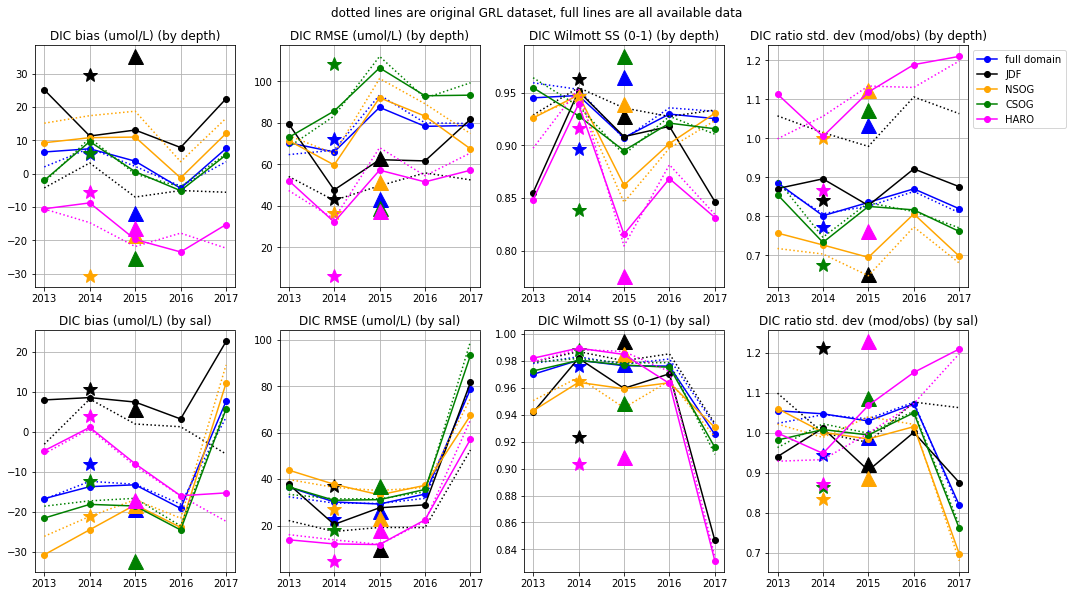

In [4]:
#arrays for storing metrics - first dimension is year, second is region (1-4 is JDF/NSOG/CSOG/HARO, 5 is overall)
reg_cols = ['blue','k', 'orange','green', 'fuchsia',  ]
plotabs = [dic_bias_COMB_ds, dic_RMSE_COMB_ds, dic_WSS_COMB_ds, dic_stdrat_MtoO_COMB_ds,\
           dic_bias_COMB_ss, dic_RMSE_COMB_ss, dic_WSS_COMB_ss, dic_stdrat_MtoO_COMB_ss]
plotabs_GRL = [dic_bias_GRL_ds, dic_RMSE_GRL_ds, dic_WSS_GRL_ds, dic_stdrat_MtoO_GRL_ds,\
           dic_bias_GRL_ss, dic_RMSE_GRL_ss, dic_WSS_GRL_ss, dic_stdrat_MtoO_GRL_ss]
plotabs_D14 = [df_2014_D14_ds['dic_bias'],df_2014_D14_ds['dic_RMSE'],df_2014_D14_ds['dic_WSS'],\
              df_2014_D14_ds['dic_stdrat_MtoO'],df_2014_D14_ss['dic_bias'],df_2014_D14_ss['dic_RMSE'],\
               df_2014_D14_ss['dic_WSS'],df_2014_D14_ss['dic_stdrat_MtoO']]
plotabs_D15 = [df_2015_D15_ds['dic_bias'],df_2015_D15_ds['dic_RMSE'],df_2015_D15_ds['dic_WSS'],\
              df_2015_D15_ds['dic_stdrat_MtoO'],df_2015_D15_ss['dic_bias'],df_2015_D15_ss['dic_RMSE'],\
               df_2015_D15_ss['dic_WSS'],df_2015_D15_ss['dic_stdrat_MtoO']]

reglabs = ['full domain','JDF','NSOG','CSOG','HARO',]
titles = ['DIC bias (umol/L) (by depth)','DIC RMSE (umol/L) (by depth)',
          'DIC Wilmott SS (0-1) (by depth)','DIC ratio std. dev (mod/obs) (by depth)',
          'DIC bias (umol/L) (by sal)', \
           'DIC RMSE (umol/L) (by sal)',\
           'DIC Wilmott SS (0-1) (by sal)',
          'DIC ratio std. dev (mod/obs) (by sal)']
#plotabs = ['bias','bias']
yrs = np.arange(2013,2018,1)
fact = 0.6
fig, axs = plt.subplots(2,4, figsize=(25*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,8):

    for y in range(0,5):
        pt = plotabs[i]
        axs[i].plot(yrs,pt[y,:],color = reg_cols[y], marker = 'o', label = reglabs[y], linestyle = '-')
        pt = plotabs_GRL[i]
        axs[i].plot(yrs,pt[y,:],color = reg_cols[y], linestyle = ':')
        pt = plotabs_D14[i]
        axs[i].plot(2014,pt[y],color = reg_cols[y], marker = '*',markersize = 15)
        pt = plotabs_D15[i]
        axs[i].plot(2015,pt[y],color = reg_cols[y], marker = '^',markersize = 15)        
#         axs[i].set_xticks(yrs)
        axs[i].grid(); axs[i].set_title(titles[i])
    
    if i == 3:
        axs[i].legend(ncol =1, bbox_to_anchor = [1,1])
plt.suptitle('dotted lines are original GRL dataset, full lines are all available data')
plt.tight_layout()

plt.savefig('./extracted_calculated/DIC_stats.jpg')

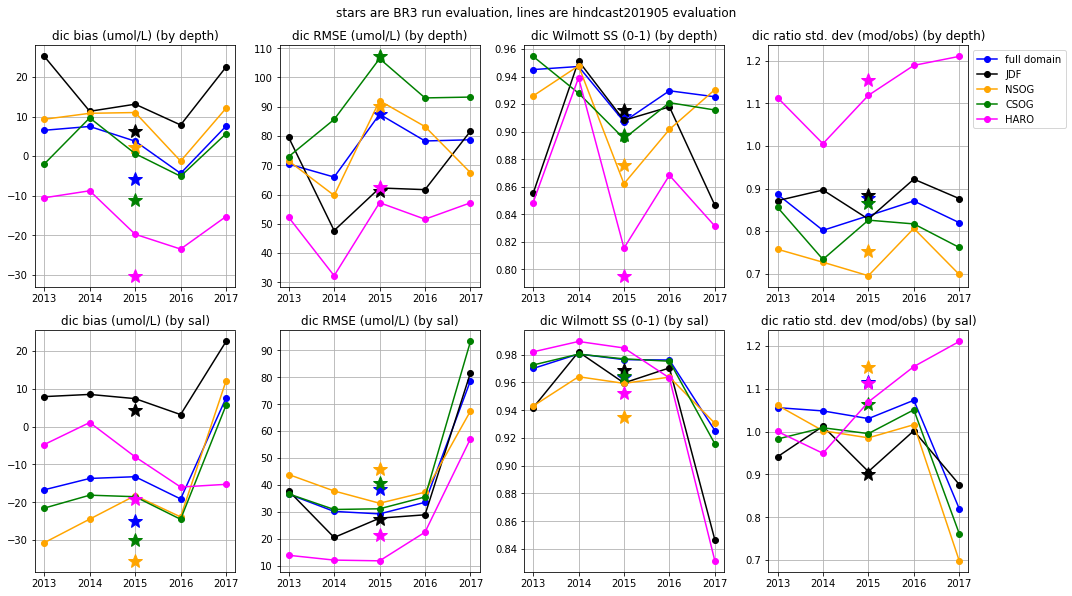

In [7]:
#arrays for storing metrics - first dimension is year, second is region (1-4 is JDF/NSOG/CSOG/HARO, 5 is overall)
reg_cols = ['blue','k', 'orange','green', 'fuchsia',  ]
plotabs = [dic_bias_COMB_ds, dic_RMSE_COMB_ds, dic_WSS_COMB_ds, dic_stdrat_MtoO_COMB_ds,\
           dic_bias_COMB_ss, dic_RMSE_COMB_ss, dic_WSS_COMB_ss, dic_stdrat_MtoO_COMB_ss]

# reg_cols = ['blue','k', 'orange','green', 'fuchsia'  ]
# plotabs = [dic_bias_COMB_ds, dic_RMSE_COMB_ds, dic_WSS_COMB_ds, dic_stdrat_MtoO_COMB_ds,\
#            dic_bias_COMB_ss, dic_RMSE_COMB_ss, dic_WSS_COMB_ss, dic_stdrat_MtoO_COMB_ss]


plotabs_COMB_BR3 = [df_2015BR3_COMB_ds['dic_bias'],df_2015BR3_COMB_ds['dic_RMSE'],df_2015BR3_COMB_ds['dic_WSS'],\
              df_2015BR3_COMB_ds['dic_stdrat_MtoO'],df_2015BR3_COMB_ss['dic_bias'],df_2015BR3_COMB_ss['dic_RMSE'],df_2015BR3_COMB_ss['dic_WSS'],\
              df_2015BR3_COMB_ss['dic_stdrat_MtoO']]
reglabs = ['full domain','JDF','NSOG','CSOG','HARO',]
titles = ['dic bias (umol/L) (by depth)','dic RMSE (umol/L) (by depth)',
          'dic Wilmott SS (0-1) (by depth)','dic ratio std. dev (mod/obs) (by depth)',
          'dic bias (umol/L) (by sal)', \
           'dic RMSE (umol/L) (by sal)',\
           'dic Wilmott SS (0-1) (by sal)',
          'dic ratio std. dev (mod/obs) (by sal)']
#plotabs = ['bias','bias']
yrs = np.arange(2013,2018,1)
fact = 0.6
fig, axs = plt.subplots(2,4, figsize=(25*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,8):

    for y in range(0,5):
        pt = plotabs[i]
        axs[i].plot(yrs,pt[y,:],color = reg_cols[y], marker = 'o', label = reglabs[y], linestyle = '-')
#         pt = plotabs_GRL[i]
#         axs[i].plot(yrs,pt[y,:],color = reg_cols[y], linestyle = ':')
#         pt = plotabs_D14[i]
#         axs[i].plot(2014,pt[y],color = reg_cols[y], marker = '*',markersize = 15)
#         pt = plotabs_D15[i]
#         axs[i].plot(2015,pt[y],color = reg_cols[y], marker = '^',markersize = 15) 
#         if i <4:
        pt = plotabs_COMB_BR3[i]

        axs[i].plot(2015,pt[y],color = reg_cols[y], marker = '*',markersize = 15) 
#         axs[i].set_xticks(yrs)
        axs[i].grid(); axs[i].set_title(titles[i])
    
    if i == 3:
        axs[i].legend(ncol =1, bbox_to_anchor = [1,1])

plt.suptitle('stars are BR3 run evaluation, lines are hindcast201905 evaluation')
plt.tight_layout()

plt.savefig('./extracted_calculated/dic_stats_BR3.jpg')

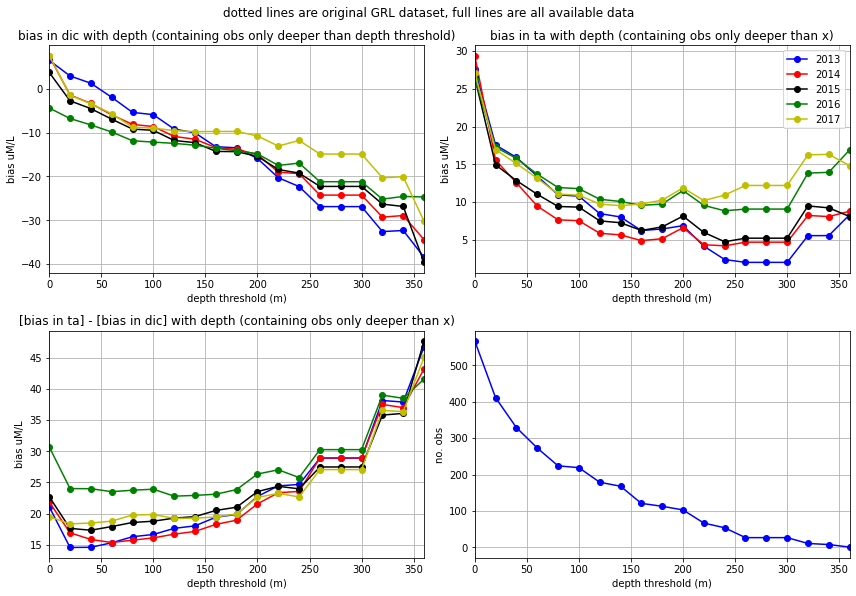

In [7]:
yr = 2013; fname = f'./extracted_calculated/STATS_{yr}_COMB_BIAS_wd_depthspace.csv'
BIAS_2013 = pd.read_csv(fname)
yr = 2014; fname = f'./extracted_calculated/STATS_{yr}_COMB_BIAS_wd_depthspace.csv'
BIAS_2014 = pd.read_csv(fname)
yr = 2015; fname = f'./extracted_calculated/STATS_{yr}_COMB_BIAS_wd_depthspace.csv'
BIAS_2015 = pd.read_csv(fname)
yr = 2016; fname = f'./extracted_calculated/STATS_{yr}_COMB_BIAS_wd_depthspace.csv'
BIAS_2016 = pd.read_csv(fname)
yr = 2017; fname = f'./extracted_calculated/STATS_{yr}_COMB_BIAS_wd_depthspace.csv'
BIAS_2017 = pd.read_csv(fname)
no_obs = pd.read_csv('./extracted_calculated/NOOBS_COMB_BIAS_wd_depthspace.csv')

depththres = np.arange(0,400,20)

fig, axs = plt.subplots(2,2, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


axs[0].plot(depththres,BIAS_2013['dic_bias'],color = 'blue', marker = 'o', label = '2013', linestyle = '-')
axs[0].plot(depththres,BIAS_2014['dic_bias'],color = 'r', marker = 'o', label = '2014', linestyle = '-')
axs[0].plot(depththres,BIAS_2015['dic_bias'],color = 'k', marker = 'o', label = '2015', linestyle = '-')
axs[0].plot(depththres,BIAS_2016['dic_bias'],color = 'g', marker = 'o', label = '2016', linestyle = '-')
axs[0].plot(depththres,BIAS_2017['dic_bias'],color = 'y', marker = 'o', label = '2017', linestyle = '-')
axs[0].set_title('bias in dic with depth (containing obs only deeper than depth threshold)')


axs[1].plot(depththres,BIAS_2013['alk_bias'],color = 'blue', marker = 'o', label = '2013', linestyle = '-')
axs[1].plot(depththres,BIAS_2014['alk_bias'],color = 'r', marker = 'o', label = '2014', linestyle = '-')
axs[1].plot(depththres,BIAS_2015['alk_bias'],color = 'k', marker = 'o', label = '2015', linestyle = '-')
axs[1].plot(depththres,BIAS_2016['alk_bias'],color = 'g', marker = 'o', label = '2016', linestyle = '-')
axs[1].plot(depththres,BIAS_2017['alk_bias'],color = 'y', marker = 'o', label = '2017', linestyle = '-')
axs[1].set_title('bias in ta with depth (containing obs only deeper than x)')

axs[2].plot(depththres,BIAS_2013['alk_bias']-BIAS_2013['dic_bias'],color = 'blue', marker = 'o', label = '2013', linestyle = '-')
axs[2].plot(depththres,BIAS_2014['alk_bias']-BIAS_2014['dic_bias'],color = 'r', marker = 'o', label = '2014', linestyle = '-')
axs[2].plot(depththres,BIAS_2015['alk_bias']-BIAS_2015['dic_bias'],color = 'k', marker = 'o', label = '2015', linestyle = '-')
axs[2].plot(depththres,BIAS_2016['alk_bias']-BIAS_2016['dic_bias'],color = 'g', marker = 'o', label = '2016', linestyle = '-')
axs[2].plot(depththres,BIAS_2017['alk_bias']-BIAS_2017['dic_bias'],color = 'y', marker = 'o', label = '2017', linestyle = '-')
axs[2].set_title('[bias in ta] - [bias in dic] with depth (containing obs only deeper than x)')

axs[3].plot(depththres,no_obs['no_obs'],color = 'blue', marker = 'o')

for i in range(0,4):
    axs[i].set_xlabel('depth threshold (m)'); axs[i].set_ylabel('bias uM/L')
    axs[i].grid(); axs[i].set_xlim([0,360])
    axs[3].set_ylabel('no. obs')
    
axs[1].legend(loc = 'best')
plt.tight_layout()
plt.suptitle('dotted lines are original GRL dataset, full lines are all available data')
plt.tight_layout()

plt.savefig('./extracted_calculated/biaswithdepth.jpg')

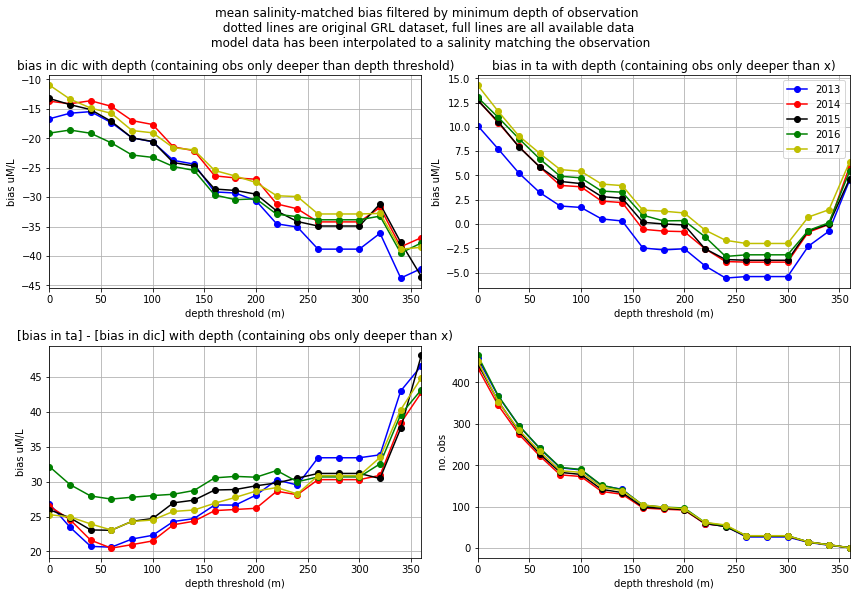

In [14]:
yr = 2013; fname = f'./extracted_calculated/STATS_{yr}_COMB_BIAS_wd_salspace.csv'
BIAS_2013 = pd.read_csv(fname)
no_obs_2013 = pd.read_csv(f'./extracted_calculated/NOOBS_{yr}_COMB_BIAS_wd_salspace.csv')
yr = 2014; fname = f'./extracted_calculated/STATS_{yr}_COMB_BIAS_wd_salspace.csv'
BIAS_2014 = pd.read_csv(fname)
no_obs_2014 = pd.read_csv(f'./extracted_calculated/NOOBS_{yr}_COMB_BIAS_wd_salspace.csv')
yr = 2015; fname = f'./extracted_calculated/STATS_{yr}_COMB_BIAS_wd_salspace.csv'
BIAS_2015 = pd.read_csv(fname)
no_obs_2015 = pd.read_csv(f'./extracted_calculated/NOOBS_{yr}_COMB_BIAS_wd_salspace.csv')
yr = 2016; fname = f'./extracted_calculated/STATS_{yr}_COMB_BIAS_wd_salspace.csv'
BIAS_2016 = pd.read_csv(fname)
no_obs_2016 = pd.read_csv(f'./extracted_calculated/NOOBS_{yr}_COMB_BIAS_wd_salspace.csv')
yr = 2017; fname = f'./extracted_calculated/STATS_{yr}_COMB_BIAS_wd_salspace.csv'
BIAS_2017 = pd.read_csv(fname)
no_obs_2017 = pd.read_csv(f'./extracted_calculated/NOOBS_{yr}_COMB_BIAS_wd_salspace.csv')

depththres = np.arange(0,400,20)

fig, axs = plt.subplots(2,2, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


axs[0].plot(depththres,BIAS_2013['dic_bias'],color = 'blue', marker = 'o', label = '2013', linestyle = '-')
axs[0].plot(depththres,BIAS_2014['dic_bias'],color = 'r', marker = 'o', label = '2014', linestyle = '-')
axs[0].plot(depththres,BIAS_2015['dic_bias'],color = 'k', marker = 'o', label = '2015', linestyle = '-')
axs[0].plot(depththres,BIAS_2016['dic_bias'],color = 'g', marker = 'o', label = '2016', linestyle = '-')
axs[0].plot(depththres,BIAS_2017['dic_bias'],color = 'y', marker = 'o', label = '2017', linestyle = '-')
axs[0].set_title('bias in dic with depth (containing obs only deeper than depth threshold)')


axs[1].plot(depththres,BIAS_2013['alk_bias'],color = 'blue', marker = 'o', label = '2013', linestyle = '-')
axs[1].plot(depththres,BIAS_2014['alk_bias'],color = 'r', marker = 'o', label = '2014', linestyle = '-')
axs[1].plot(depththres,BIAS_2015['alk_bias'],color = 'k', marker = 'o', label = '2015', linestyle = '-')
axs[1].plot(depththres,BIAS_2016['alk_bias'],color = 'g', marker = 'o', label = '2016', linestyle = '-')
axs[1].plot(depththres,BIAS_2017['alk_bias'],color = 'y', marker = 'o', label = '2017', linestyle = '-')
axs[1].set_title('bias in ta with depth (containing obs only deeper than x)')

axs[2].plot(depththres,BIAS_2013['alk_bias']-BIAS_2013['dic_bias'],color = 'blue', marker = 'o', label = '2013', linestyle = '-')
axs[2].plot(depththres,BIAS_2014['alk_bias']-BIAS_2014['dic_bias'],color = 'r', marker = 'o', label = '2014', linestyle = '-')
axs[2].plot(depththres,BIAS_2015['alk_bias']-BIAS_2015['dic_bias'],color = 'k', marker = 'o', label = '2015', linestyle = '-')
axs[2].plot(depththres,BIAS_2016['alk_bias']-BIAS_2016['dic_bias'],color = 'g', marker = 'o', label = '2016', linestyle = '-')
axs[2].plot(depththres,BIAS_2017['alk_bias']-BIAS_2017['dic_bias'],color = 'y', marker = 'o', label = '2017', linestyle = '-')
axs[2].set_title('[bias in ta] - [bias in dic] with depth (containing obs only deeper than x)')

axs[3].plot(depththres,no_obs_2013['no_obs'],color = 'blue', marker = 'o')
axs[3].plot(depththres,no_obs_2014['no_obs'],color = 'r', marker = 'o')
axs[3].plot(depththres,no_obs_2015['no_obs'],color = 'k', marker = 'o')
axs[3].plot(depththres,no_obs_2016['no_obs'],color = 'g', marker = 'o')
axs[3].plot(depththres,no_obs_2017['no_obs'],color = 'y', marker = 'o')


for i in range(0,4):
    axs[i].set_xlabel('depth threshold (m)'); axs[i].set_ylabel('bias uM/L')
    axs[i].grid(); axs[i].set_xlim([0,360])
    axs[3].set_ylabel('no. obs')
    
axs[1].legend(loc = 'best')
plt.tight_layout()
plt.suptitle('mean salinity-matched bias filtered by minimum depth of observation \n dotted lines are original GRL dataset, full lines are all available data \n model data has been interpolated to a salinity matching the observation')
plt.tight_layout()

plt.savefig('./extracted_calculated/biaswithdepth_salspace.jpg')